In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statistics as stat

In [2]:
dummy = ''

with open('multi.txt', 'r') as file:
    dummy = file.read()
    
dummy

'Stroke: \n10.69,56.36\n10.69,56.33\n10.68,56.3\n10.66,56.27\n10.62,56.23\n10.57,56.21\n10.51,56.22\n10.42,56.25\n10.32,56.31\n10.23,56.42\n10.14,56.54\n10.09,56.68\n10.06,56.8\n10.07,56.91\n10.09,56.98\n10.15,57.06\n10.22,57.1\n10.3,57.12\n10.4,57.1\n10.51,57.05\n10.62,56.95\n10.74,56.83\n10.84,56.7\n10.87,56.57\n10.92,56.48\n10.94,56.41\n10.94,56.33\n10.93,56.27\n10.9,56.24\n10.87,56.22\n10.83,56.23\n10.76,56.24\n10.67,56.3\n10.6,56.36\n10.53,56.46\n10.48,56.56\n10.44,56.67\n10.44,56.74\n10.47,56.78\n10.51,56.82\n10.58,56.83\n10.66,56.82\n10.77,56.76\n10.89,56.65\n10.96,56.53\n11,56.43\n11.02,56.36\n11.01,56.3\n10.99,56.24\n10.95,56.2\n10.92,56.2\n10.86,56.21\n10.77,56.25\n10.66,56.34\n10.55,56.46\n10.47,56.59\n10.43,56.73\n10.43,56.8\n10.45,56.83\n10.48,56.86\n10.53,56.87\n10.61,56.86\n10.69,56.81\n10.79,56.71\n10.88,56.58\n10.96,56.45\n11,56.33\n11,56.26\n10.98,56.2\n10.96,56.18\n10.93,56.17\n10.87,56.18\n10.79,56.21\n10.67,56.31\n10.58,56.42\n10.48,56.59\n10.43,56.75\n10.43,56.84\

In [3]:
new_dummy = [item.strip().split('\n') for item in dummy.split('Stroke:') if item]
new_dummy = [[temp for temp in item if temp] for item in new_dummy]
new_dummy

[['10.69,56.36',
  '10.69,56.33',
  '10.68,56.3',
  '10.66,56.27',
  '10.62,56.23',
  '10.57,56.21',
  '10.51,56.22',
  '10.42,56.25',
  '10.32,56.31',
  '10.23,56.42',
  '10.14,56.54',
  '10.09,56.68',
  '10.06,56.8',
  '10.07,56.91',
  '10.09,56.98',
  '10.15,57.06',
  '10.22,57.1',
  '10.3,57.12',
  '10.4,57.1',
  '10.51,57.05',
  '10.62,56.95',
  '10.74,56.83',
  '10.84,56.7',
  '10.87,56.57',
  '10.92,56.48',
  '10.94,56.41',
  '10.94,56.33',
  '10.93,56.27',
  '10.9,56.24',
  '10.87,56.22',
  '10.83,56.23',
  '10.76,56.24',
  '10.67,56.3',
  '10.6,56.36',
  '10.53,56.46',
  '10.48,56.56',
  '10.44,56.67',
  '10.44,56.74',
  '10.47,56.78',
  '10.51,56.82',
  '10.58,56.83',
  '10.66,56.82',
  '10.77,56.76',
  '10.89,56.65',
  '10.96,56.53',
  '11,56.43',
  '11.02,56.36',
  '11.01,56.3',
  '10.99,56.24',
  '10.95,56.2',
  '10.92,56.2',
  '10.86,56.21',
  '10.77,56.25',
  '10.66,56.34',
  '10.55,56.46',
  '10.47,56.59',
  '10.43,56.73',
  '10.43,56.8',
  '10.45,56.83',
  '10.48,56.86

In [4]:
df = pd.DataFrame(new_dummy).transpose()
df.head()

,0,1,2,3,4,5,6
0,"10.69,56.36","14.56,57.4","19.62,56.95","23.52,57.86","26.56,57.95","25.18,55.77","25.01,56.27"
1,"10.69,56.33","14.57,57.37","19.65,56.93","23.55,57.83","26.6,57.94","26.1,55.84","25.24,56.23"
2,"10.68,56.3","14.57,57.32","19.67,56.92","23.54,57.78","26.63,57.9","27.22,55.82","25.77,56.17"
3,"10.66,56.27","14.56,57.29","19.68,56.9","23.55,57.73","26.66,57.86","27.51,55.81","26.05,56.17"
4,"10.62,56.23","14.54,57.25","19.68,56.88","23.55,57.68","26.68,57.82","27.69,55.76","26.32,56.14"


In [5]:
def process(x):
    
    if not isinstance(x, str):
        return None,None
        
    splitted = x.split(',')
    
    return float(splitted[0]), float(splitted[1])

In [6]:
rng = 0
for col in df.columns:
    df[str(col) + '_x'], df[str(col) + '_y'] = zip(*df[col].apply(lambda x : process(x)))
    df = df.drop([col], axis=1)
    rng += 1

print(df)

       0_x    0_y    1_x    1_y    2_x    2_y    3_x    3_y    4_x    4_y  \
0    10.69  56.36  14.56   57.4  19.62  56.95  23.52  57.86  26.56  57.95   
1    10.69  56.33  14.57  57.37  19.65  56.93  23.55  57.83   26.6  57.94   
2    10.68  56.30  14.57  57.32  19.67  56.92  23.54  57.78  26.63   57.9   
3    10.66  56.27  14.56  57.29  19.68   56.9  23.55  57.73  26.66  57.86   
4    10.62  56.23  14.54  57.25  19.68  56.88  23.55  57.68  26.68  57.82   
5    10.57  56.21   14.5  57.22   19.7  56.88  23.52  57.63  26.68  57.79   
6    10.51  56.22  14.46  57.21  19.69  56.87   23.5   57.6   26.7  57.75   
7    10.42  56.25  14.41  57.21  19.69  56.86  23.46  57.58  26.68  57.71   
8    10.32  56.31  14.34  57.22  19.69  56.85  23.41  57.56  26.64  57.67   
9    10.23  56.42  14.26  57.26  19.68  56.84  23.34  57.58  26.59  57.64   
10   10.14  56.54  14.15  57.32  19.68  56.84  23.24  57.61  26.52  57.63   
11   10.09  56.68  14.04  57.42  19.68  56.83  23.15  57.68  26.43  57.65   

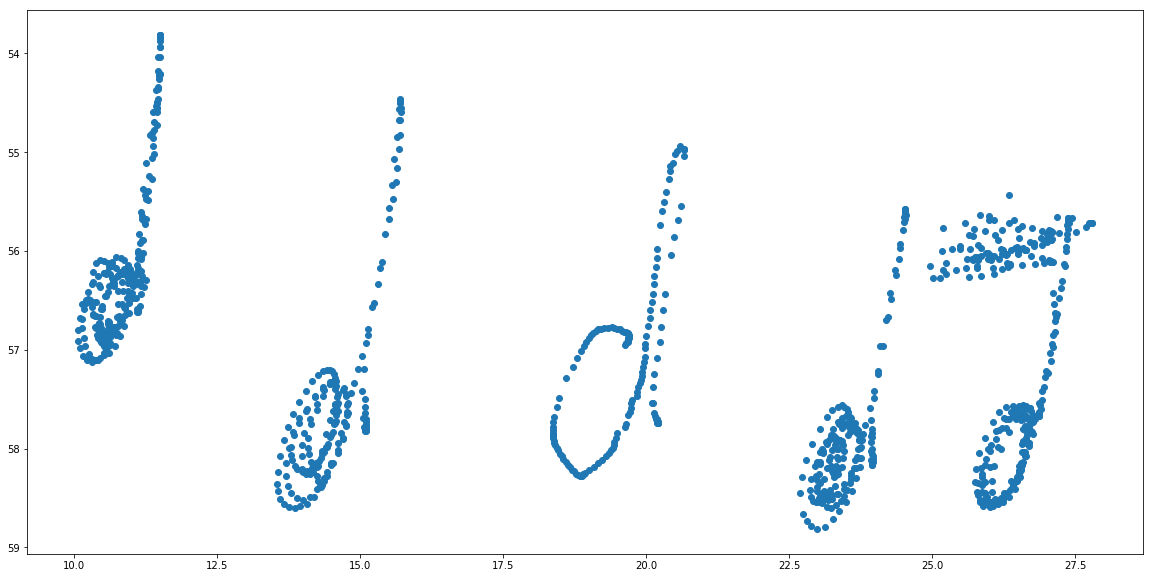

In [42]:
x = pd.Series()
y = pd.Series()
for i in range(rng):
    x = x.append(df[str(i)+'_x'])
    y = y.append(df[str(i)+'_y'])

x = [i for i in x if i is not None]
y = [i for i in y if i is not None]
plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.gca().invert_yaxis()
plt.show()

[[10.81350746 56.17201493]
 [25.30368421 57.38017544]
 [19.5788     57.1442    ]
 [14.54819588 57.45613402]]
[0 0 0 ... 1 1 1]
0.1543585932278904
0.31786839462217026
0.46305456
0.19699405955298144
0.18549724376731294
0.5917989795918369
0.34193947487550935


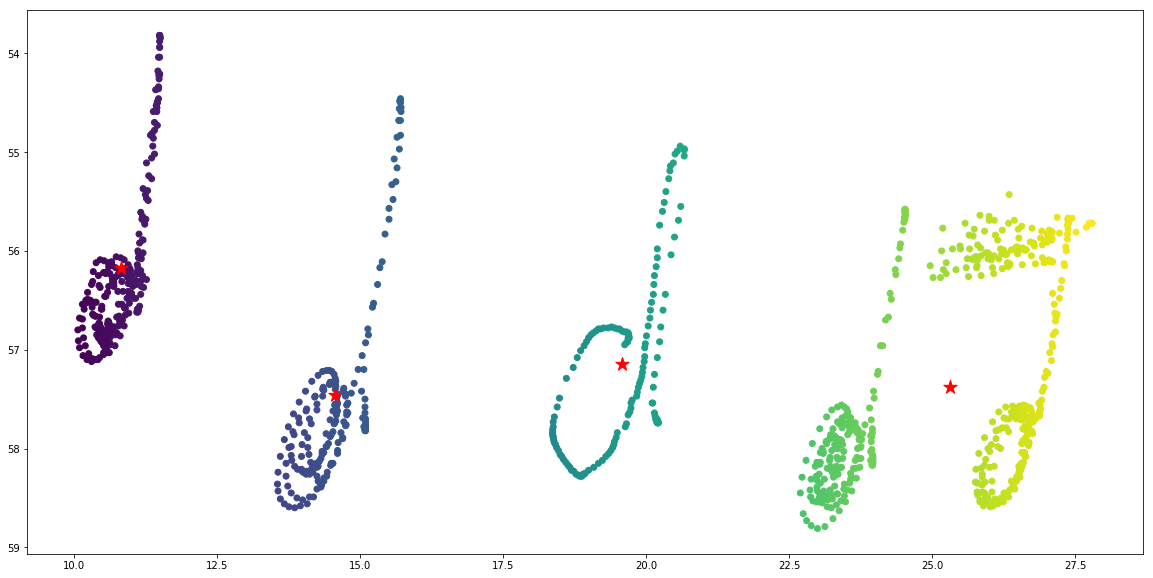

In [62]:
# cluster each stroke in case the user put multiple strokes per note
# determine k for KMeans (later)
k = 4
data = np.array(list(zip(x,y)))
km = KMeans(n_clusters=k)
km = km.fit(data)
labels = km.predict(data)
centr = km.cluster_centers_
print(centr)

plt.figure(figsize=(20,10))
plt.gca().invert_yaxis()
plt.scatter(data[:,0], data[:,1],c=x)
plt.scatter(centr[:,0],centr[:,1], marker='*', s = 200, c = '#ff0000')

# identify which type of note each cluster is via variance

ls = pd.Series()
for i in range(rng):
    ls = [j for j in df[str(i)+'_x'] if j is not None]
    print(stat.pvariance(ls))